### NYC Taxi Build  
This is a run through of 
https://www.kaggle.com/code/elemento/nyc-yellowtriptaxi/notebook
which is having some serious issues!!!!
(PCA uses the target var for example).

But it did the job do touch all the libs / functions

The model is useless though

In [2]:
import pandas as pd # for data analysis
import numpy as np # for scientific calculation
import seaborn as sns # for statistical plotting
import datetime # for working with date fields
import matplotlib.pyplot as plt # for plotting
%matplotlib inline
import math # for mathematical calculation

In [3]:
nydata = pd.read_csv('./data/yellow_tripdata_2016-03.csv')

# Data Cleaning and Data Understanding.

In [6]:
nydata.isnull().sum() # check for missing values

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
nydata.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [8]:
nydata.shape

(12210952, 19)

In [9]:
check_duplicates = nydata[nydata.duplicated()]
print(check_duplicates.shape)

(1, 19)


In [10]:
#Exploring data by using info() method. It doesn't contains any null values.
#Observation: No null values exists.
nydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12210952 entries, 0 to 12210951
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        int64  
 4   trip_distance          float64
 5   pickup_longitude       float64
 6   pickup_latitude        float64
 7   RatecodeID             int64  
 8   store_and_fwd_flag     object 
 9   dropoff_longitude      float64
 10  dropoff_latitude       float64
 11  payment_type           int64  
 12  fare_amount            float64
 13  extra                  float64
 14  mta_tax                float64
 15  tip_amount             float64
 16  tolls_amount           float64
 17  improvement_surcharge  float64
 18  total_amount           float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [11]:
nydata.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07,1.221095e+07
mean,1.530647e+00,1.659580e+00,6.131770e+00,-7.287133e+01,4.014349e+01,1.040395e+00,-7.293679e+01,4.018050e+01,1.340920e+00,1.279508e+01,3.455600e-01,4.976363e-01,1.792582e+00,3.152554e-01,2.997199e-01,1.604582e+01
std,4.990599e-01,1.312189e+00,6.156483e+03,8.964108e+00,4.937996e+00,5.807342e-01,8.696974e+00,4.790940e+00,4.902621e-01,1.340979e+02,4.563069e-01,4.863319e-02,2.549124e+00,1.751526e+00,1.230647e-02,1.343578e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-1.616987e+02,0.000000e+00,1.000000e+00,-3.760000e+02,-5.850000e+01,-1.000000e+00,-2.000000e+01,-1.604000e+01,-3.000000e-01,-3.763000e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,-7.399174e+01,4.073630e+01,1.000000e+00,-7.399125e+01,4.073462e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.700000e+00,-7.398161e+01,4.075325e+01,1.000000e+00,-7.397961e+01,4.075375e+01,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.350000e+00,0.000000e+00,3.000000e-01,1.180000e+01
75%,2.000000e+00,2.000000e+00,3.180000e+00,-7.396678e+01,4.076765e+01,1.000000e+00,-7.396228e+01,4.076910e+01,2.000000e+00,1.450000e+01,5.000000e-01,5.000000e-01,2.360000e+00,0.000000e+00,3.000000e-01,1.776000e+01
max,2.000000e+00,9.000000e+00,1.907263e+07,0.000000e+00,6.685682e+01,9.900000e+01,0.000000e+00,5.079786e+01,4.000000e+00,4.294967e+05,8.000000e+01,7.930000e+01,8.500000e+02,1.410320e+03,3.000000e-01,4.295622e+05


# Exploratory Data Analysis (EDA) and Feature Engineering


In [12]:
# Distance  function to calculate distance between given longitude and latitude points.
# Observation: This piece of code taken from blogs. When I thought how to get pickup point and drop point information
# I found this code and I can able to calculate distance here. It's as been called as 'Haversine Formula'
from math import radians, cos, sin, asin, sqrt

def distance(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [13]:
nydata['distance'] = nydata.apply(lambda x: distance(x['pickup_longitude'],x['pickup_latitude'],x['dropoff_longitude'],x['dropoff_latitude']), axis = 1)

In [14]:
plotsample = nydata.sample(10000)

<Axes: xlabel='distance', ylabel='trip_distance'>

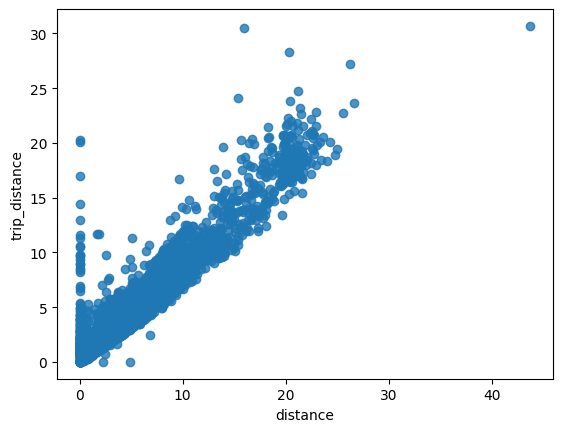

In [15]:
sns.regplot(x='distance', y='trip_distance', data=plotsample[plotsample['distance'] < 50], fit_reg=False)

In [16]:
nydata['tpep_pickup_datetime'] = pd.to_datetime(nydata['tpep_pickup_datetime'])
nydata['tpep_dropoff_datetime'] = pd.to_datetime(nydata['tpep_dropoff_datetime'])

In [17]:
nydata["duration"] = (nydata["tpep_dropoff_datetime"] - nydata["tpep_pickup_datetime"]).dt.total_seconds()

In [18]:
nydata['speed']= (nydata.distance/(nydata.duration/3600))

## Data Visualization

In [19]:
#Copied dataframe into another dataframe.
# Observation: Using another dataframe for data visualization and keeping original copy for ML pipeline.
nyc_taxi_visual = nydata.copy().sample(100000)

In [20]:
#Drop unused columns for data visualization
nyc_taxi_visual = nyc_taxi_visual.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'],axis=1)
nyc_taxi_visual.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'distance', 'duration',
       'speed'],
      dtype='object')

In [21]:
# Verifying datatype, count, null values by using info() method.
nyc_taxi_visual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 8962481 to 725563
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  int64         
 6   payment_type           100000 non-null  int64         
 7   fare_amount            100000 non-null  float64       
 8   extra                  100000 non-null  float64       
 9   mta_tax                100000 non-null  float64       
 10  tip_amount             100000 non-null  float64       
 11  tolls_amount           100000 non-null  float64       
 12  improvement_surcharge  100000 non-null  flo

In [22]:
#Converting distance and speed values into int datatype.
nyc_taxi_visual['distance'] = nyc_taxi_visual['distance'].apply(lambda x: int(x))
nyc_taxi_visual['speed'] = nyc_taxi_visual['speed'].replace([np.inf, -np.inf], np.nan).fillna(0).apply(lambda x: int(x))

In [23]:
# Verifying datatype, count, null values by using info() method.
nyc_taxi_visual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 8962481 to 725563
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   RatecodeID             100000 non-null  int64         
 6   payment_type           100000 non-null  int64         
 7   fare_amount            100000 non-null  float64       
 8   extra                  100000 non-null  float64       
 9   mta_tax                100000 non-null  float64       
 10  tip_amount             100000 non-null  float64       
 11  tolls_amount           100000 non-null  float64       
 12  improvement_surcharge  100000 non-null  flo

In [24]:
nyc_taxi_visual_final = nyc_taxi_visual[nyc_taxi_visual['distance'] < 600]
nyc_taxi_visual_final = nyc_taxi_visual_final[nyc_taxi_visual_final['speed'] < 100]
nyc_taxi_visual_final = nyc_taxi_visual_final[nyc_taxi_visual_final['duration'] < 36000]
nyc_taxi_visual_final = nyc_taxi_visual_final[nyc_taxi_visual_final['speed'] > 1]

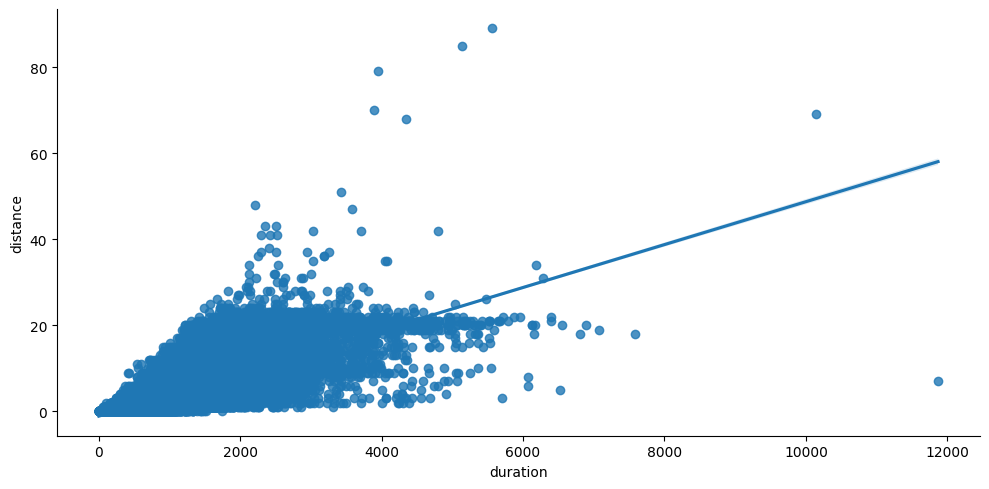

In [25]:
sns.lmplot(x='duration', y='distance', data=nyc_taxi_visual_final, aspect=2.0) 

<Axes: xlabel='duration', ylabel='Density'>

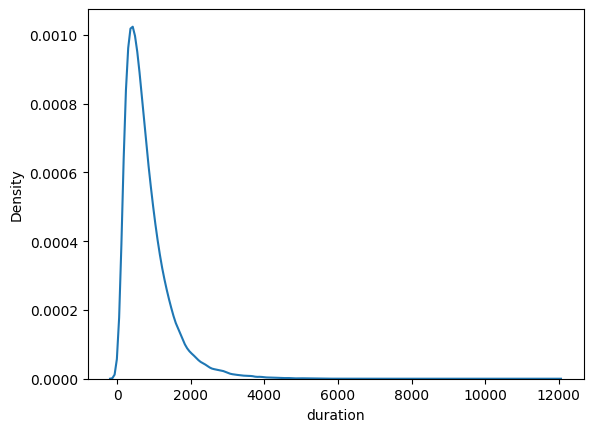

In [26]:
sns.kdeplot(nyc_taxi_visual_final['duration'])

<Axes: xlabel='passenger_count', ylabel='Count'>

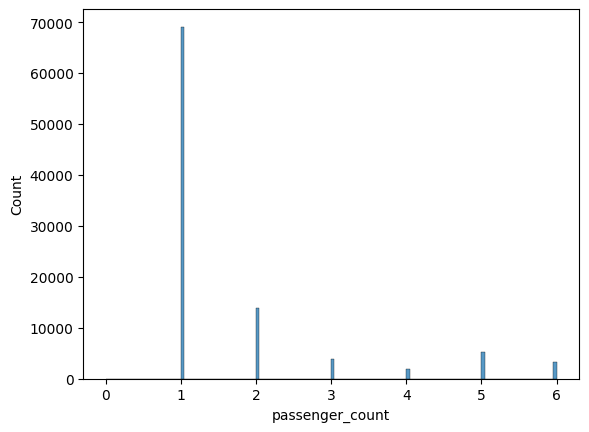

In [27]:
sns.histplot(nyc_taxi_visual_final['passenger_count'])

<Axes: xlabel='VendorID', ylabel='passenger_count'>

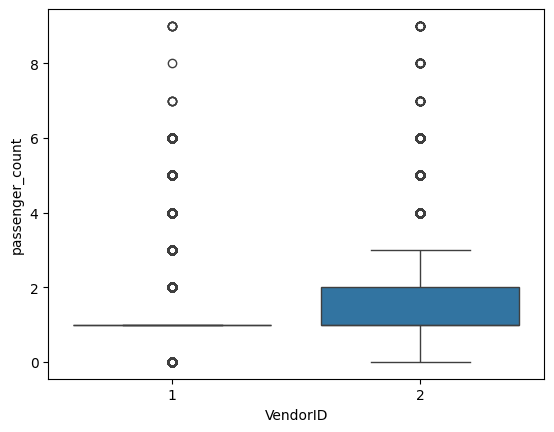

In [28]:
sns.boxplot(x="VendorID", y="passenger_count", data=nydata)

In [29]:
nyc_taxi_visual_final.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'distance', 'duration',
       'speed'],
      dtype='object')

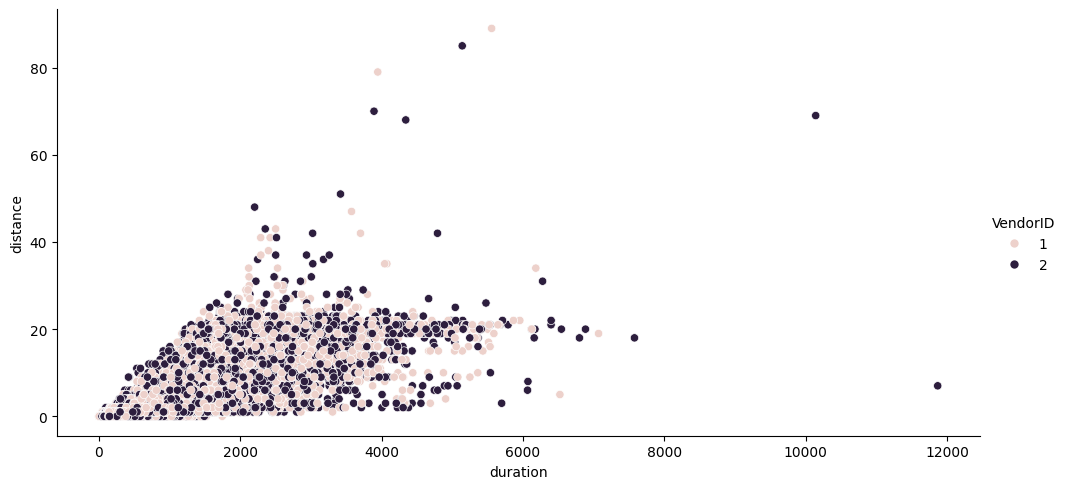

In [30]:
sns.relplot(x='duration', y='distance', data=nyc_taxi_visual_final, hue='VendorID', aspect=2.0)

# ML Pipeline for DataModeling

## Data Sampling, Feature Engineering and Importance

In [31]:
# Dropping unused columns
nyc_taxi_final=nydata.drop(['VendorID','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag'],axis=1)


In [32]:
nyc_taxi_final.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'distance', 'duration', 'speed'],
      dtype='object')

In [33]:
# Creating new feature columns.
nyc_taxi_final['pickup_min'] = nyc_taxi_final['tpep_pickup_datetime'].apply(lambda x : x.minute)
nyc_taxi_final['pickup_hour'] = nyc_taxi_final['tpep_pickup_datetime'].apply(lambda x : x.hour)
nyc_taxi_final['pickup_day'] = nyc_taxi_final['tpep_pickup_datetime'].apply(lambda x : x.day)
nyc_taxi_final['pickup_month']= nyc_taxi_final['tpep_pickup_datetime'].apply(lambda x : int(x.month))
nyc_taxi_final['pickup_weekday'] = nyc_taxi_final['tpep_pickup_datetime'].dt.day_name()
nyc_taxi_final['pickup_month_name'] = nyc_taxi_final['tpep_pickup_datetime'].dt.month_name()

nyc_taxi_final['drop_hour'] = nyc_taxi_final['tpep_dropoff_datetime'].apply(lambda x : x.hour)
nyc_taxi_final['drop_month'] = nyc_taxi_final['tpep_dropoff_datetime'].apply(lambda x : int(x.month))
nyc_taxi_final['drop_day'] = nyc_taxi_final['tpep_dropoff_datetime'].apply(lambda x : x.day)
nyc_taxi_final['drop_min'] = nyc_taxi_final['tpep_dropoff_datetime'].apply(lambda x : x.minute)

In [34]:
#Verifying newly created columns.
nyc_taxi_final.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'distance', 'duration', 'speed', 'pickup_min',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday',
       'pickup_month_name', 'drop_hour', 'drop_month', 'drop_day', 'drop_min'],
      dtype='object')

In [35]:
## Removing all those records where speed is less than 1 and distance is 0
print(nyc_taxi_final.shape)
df=nyc_taxi_final[(nyc_taxi_final['speed']<1)&(nyc_taxi_final['distance']==0)]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(12210952, 26)
(12010539, 26)


In [36]:
# Identified some of trips are not valid from the given dataset.
# For e.g., Index 531 clearly says that pick up adn drop off date and time is having morethan 23 hours trip_duration
# by covering distance only 3 miles which is not possible in realtime scenarios. Removing those outliers. Total 1416 records.
nyc_taxi_final[(nyc_taxi_final['pickup_day']< nyc_taxi_final['drop_day'])& (nyc_taxi_final['duration']> 10000) &(nyc_taxi_final['distance'] <5) & (nyc_taxi_final['pickup_hour']<23)]

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,payment_type,fare_amount,extra,mta_tax,tip_amount,...,pickup_min,pickup_hour,pickup_day,pickup_month,pickup_weekday,pickup_month_name,drop_hour,drop_month,drop_day,drop_min
927,2016-03-10 07:12:14,2016-03-11 06:37:30,1,2.77,1,1,10.0,0.0,0.5,2.16,...,12,7,10,3,Thursday,March,6,3,11,37
2135,2016-03-10 07:19:46,2016-03-11 07:10:25,6,2.30,1,1,11.0,0.0,0.5,1.77,...,19,7,10,3,Thursday,March,7,3,11,10
2273,2016-03-10 07:20:36,2016-03-11 00:00:00,3,0.86,1,1,5.0,0.0,0.5,1.16,...,20,7,10,3,Thursday,March,0,3,11,0
3132,2016-03-10 07:25:53,2016-03-11 06:47:37,1,2.72,1,1,14.0,0.0,0.5,2.96,...,25,7,10,3,Thursday,March,6,3,11,47
4361,2016-03-10 07:33:03,2016-03-11 00:00:00,2,0.97,1,1,5.5,0.0,0.5,0.94,...,33,7,10,3,Thursday,March,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11796358,2016-03-30 22:56:29,2016-03-31 22:51:30,4,2.90,1,1,10.5,0.5,0.5,3.54,...,56,22,30,3,Wednesday,March,22,3,31,51
11796533,2016-03-30 22:56:59,2016-03-31 22:49:54,1,3.53,1,1,14.5,0.5,0.5,2.37,...,56,22,30,3,Wednesday,March,22,3,31,49
11796712,2016-03-30 22:57:30,2016-03-31 22:00:23,4,0.62,1,2,4.5,0.5,0.5,0.00,...,57,22,30,3,Wednesday,March,22,3,31,0
11796949,2016-03-30 22:58:06,2016-03-31 22:54:40,1,1.61,1,2,7.5,0.5,0.5,0.00,...,58,22,30,3,Wednesday,March,22,3,31,54


In [37]:
# Dropping records for those whose pickup and drop timings are more and distance travel <3 miles. (Outliers.)
print(nyc_taxi_final.shape)
df=nyc_taxi_final[(nyc_taxi_final['pickup_day']< nyc_taxi_final['drop_day'])& (nyc_taxi_final['duration']> 10000) &(nyc_taxi_final['distance'] <5) & (nyc_taxi_final['pickup_hour']<23)]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(12010539, 26)
(11997283, 26)


In [38]:
# Droppring records where speed and distance is <1. (Outliers)
print(nyc_taxi_final.shape)
df=nyc_taxi_final[(nyc_taxi_final['speed']<1) & (nyc_taxi_final['distance']< 1) ]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(11997283, 26)
(11955413, 26)


In [39]:
# Removing outliers identified based on trip_duration and distance.
nyc_taxi_final[nyc_taxi_final['duration']/60 >10000][['duration','distance']]
print(nyc_taxi_final.shape)
nyc_taxi_final[nyc_taxi_final['duration']/60 >10000]['duration']
nyc_taxi_final.drop([978383,680594,355003],inplace=True)
print(nyc_taxi_final.shape)

(11955413, 26)
(11955410, 26)


In [40]:
# Removing outliers whose distance is less 200 meters. In real scenario, no-one will pick taxi for lesstance 200 meters. 
print(nyc_taxi_final.shape)
df=nyc_taxi_final[nyc_taxi_final['distance']< .2]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(11955410, 26)
(11904341, 26)


In [41]:
# Removing outliers those trips where passenger_count is 0.
print(nyc_taxi_final.shape)
df=nyc_taxi_final[nyc_taxi_final['passenger_count']==0]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(11904341, 26)
(11904158, 26)


In [42]:
# Removing outliers where trip_duration <120 seconds. In real-time scenario passengers will take trip for more than 2 mins.
print(nyc_taxi_final.shape)
df=nyc_taxi_final[nyc_taxi_final['duration']<120]
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(11904158, 26)
(11722841, 26)


/tmp/ipykernel_68000/357697481.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dist_plot,bins=10)


<Axes: xlabel='speed', ylabel='Density'>

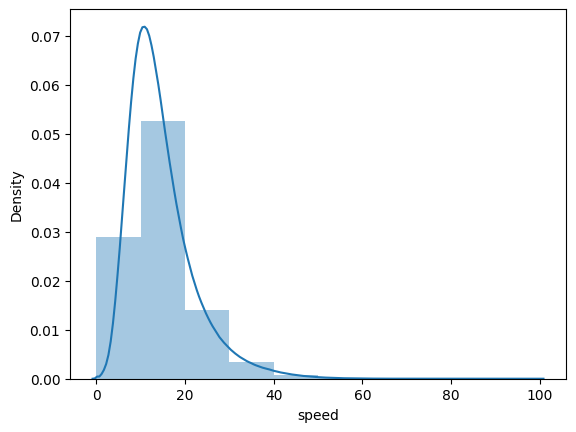

In [43]:
# Distribution plot to verify the speed of trip.
# Observations: Most of trips is having speed < 40 miles/per hour. It's valid in newyork city trips.
dist_plot=nyc_taxi_final[nyc_taxi_final['speed']<100]['speed']
sns.distplot(dist_plot,bins=10)

In [44]:
print(nyc_taxi_final.shape)
df=nyc_taxi_final[nyc_taxi_final['speed']>50]['speed']
nyc_taxi_final.drop(df.index,inplace=True)
print(nyc_taxi_final.shape)

(11722841, 26)
(11677372, 26)


In [45]:
# Verifying the Day-Wise trip counts.
#Observation: We are having less trips on sunday and monday here.
print("Day-wise pickup totals")
print(nyc_taxi_final['pickup_weekday'].value_counts())


Day-wise pickup totals
pickup_weekday
Thursday     1950753
Wednesday    1876684
Tuesday      1796150
Saturday     1659217
Friday       1624030
Sunday       1411389
Monday       1359149
Name: count, dtype: int64


<Axes: xlabel='pickup_weekday', ylabel='count'>

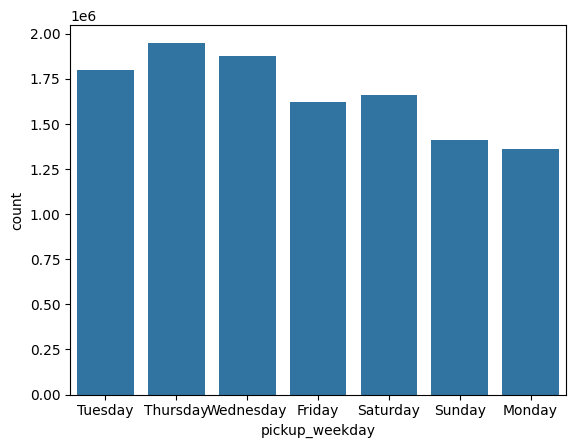

In [46]:
# Countplot visualization for Day-wise trip counts.
# Observations: Friday and Saturday is having more trips when compare to other days.
sns.countplot(x='pickup_weekday',data=nyc_taxi_final)

<Axes: >

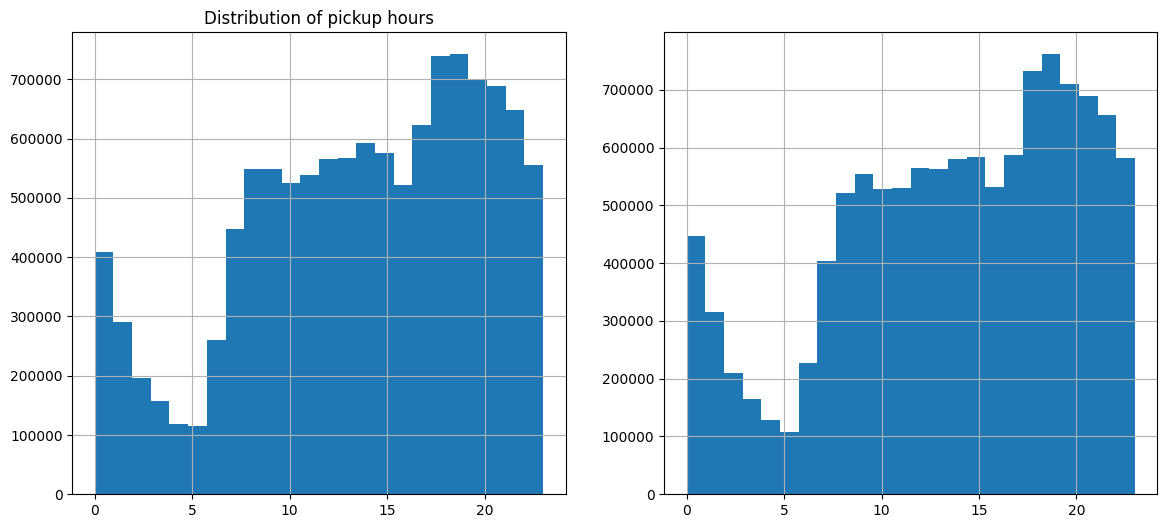

In [47]:
figure, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

nyc_taxi_final.pickup_hour.hist(bins=24, ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

nyc_taxi_final.drop_hour.hist(bins=24, ax=ax[1])



## Model Building, Evalutaion & Hyper parameter Tuning

In [48]:
#Import Sklearn and models
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold

In [49]:
#Verifying final dataframe columns
nyc_taxi_final.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'distance', 'duration', 'speed', 'pickup_min',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday',
       'pickup_month_name', 'drop_hour', 'drop_month', 'drop_day', 'drop_min'],
      dtype='object')

### Data Sampling Technique

In [50]:
nyc_taxi_final_sampling=nyc_taxi_final.sample(n=500000, replace="False")

In [51]:
nyc_taxi_final_sampling.shape

(500000, 26)

In [52]:
nyc_taxi_final_sampling.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'distance', 'duration', 'speed', 'pickup_min',
       'pickup_hour', 'pickup_day', 'pickup_month', 'pickup_weekday',
       'pickup_month_name', 'drop_hour', 'drop_month', 'drop_day', 'drop_min'],
      dtype='object')

## Linear Regression

In [53]:
#Applying Standard Scaler

X2=nyc_taxi_final_sampling.drop([
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'speed',
    'pickup_weekday',
    'pickup_month_name',
    ],axis=1)
    
X2['distance']=X2['distance'].apply(lambda x: int(x))
X1=preprocessing.scale(X2)
X=pd.DataFrame(X1)
y=nyc_taxi_final_sampling['duration']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)
reg =linear_model.LinearRegression()

reg.fit(X_train,y_train)
print("reg.intercept_=> %10.10f" %(reg.intercept_))
#print(list(zip(feature_columns, reg.coef_)))
y_pred=reg.predict(X_test)
rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=reg.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(reg,X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())


reg.intercept_=> 870.4693364152
Mean Absolute Error    : 19.99476157012917
Mean Squared Error     : 599.7228163550516
Root Mean Squared Error =  24.489238786762066
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 24.45363095971176
Maximum Error is : 69.88931755922385
Minimum Error is : -59.421019478961625
Mean cross-validation score: 1.00


## XG Boost Regressor

In [54]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.model_selection import RandomizedSearchCV ,cross_val_score, KFold
X2=nyc_taxi_final_sampling.drop([
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'speed',
    'pickup_weekday',
    'pickup_month_name',
    ],axis=1)
    
X2['distance']=X2['distance'].apply(lambda x: int(x))
X1=preprocessing.scale(X2)
X=pd.DataFrame(X1)
y=nyc_taxi_final_sampling['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

model = xgb.XGBRegressor()
model.fit(X_train,y_train)
print(model)
y_pred = model.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
# Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=model.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(model,X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error    : 124.1720706396103
Mean Squared Error     : 1498596.9726001418
Root Mean Squared Error =  1224.171953852947
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 705.294

## Ridge Regression

In [55]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

X2=nyc_taxi_final_sampling.drop([
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'speed',
    'pickup_weekday',
    'pickup_month_name',
    ],axis=1)
    
X2['distance']=X2['distance'].apply(lambda x: int(x))
scaler = StandardScaler()
X1 = scaler.fit_transform(X2)
X=pd.DataFrame(X1)
y=nyc_taxi_final_sampling['duration']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train,y_train)

y_pred = ridgeReg.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# NULL RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=ridgeReg.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(ridgeReg,X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean Absolute Error    : 26.095322538941492
Mean Squared Error     : 8784.858850492918
Root Mean Squared Error =  93.727577854615
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 94.63536164189871
Maximum Error is : 4439.6077644482575
Minimum Error is : -732.1156000376322
Mean cross-validation score: 1.00


## RidgeCV (Cross Validation -  Hyper Tuning parameter)

In [56]:
from sklearn.linear_model import RidgeCV
## training the model

X2=nyc_taxi_final_sampling.drop([
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'duration',
    'speed',
    'pickup_weekday',
    'pickup_month_name',
    ],axis=1)
    
X2['distance']=X2['distance'].apply(lambda x: int(x))
scaler = StandardScaler()
X1 = scaler.fit_transform(X2)
X=pd.DataFrame(X1)
y=nyc_taxi_final_sampling['duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

ridgeRegCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridgeRegCV.fit(X_train,y_train)


y_pred = ridgeRegCV.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=ridgeRegCV.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(ridgeRegCV,X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean Absolute Error    : 20.0132868085067
Mean Squared Error     : 603.406045655348
Root Mean Squared Error =  24.564324652946354
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 24.52937699847322
Maximum Error is : 161.1408253917034
Minimum Error is : -72.64352233008117
Mean cross-validation score: 1.00


# Running Model with PCA 

In [57]:
nyc_taxi_final_sampling.shape

(500000, 26)

In [58]:
#Aligning data for PCA.
nyc_taxi_final_sampling.columns
nyc_taxi_pca=nyc_taxi_final_sampling.copy()
nyc_taxi_pca.drop([
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime',
    'trip_distance',
    'fare_amount',
    'extra',
    'mta_tax',
    'tip_amount',
    'tolls_amount',
    'improvement_surcharge',
    'total_amount',
    'speed',
    'pickup_weekday',
    'pickup_month_name',
    'pickup_month',
    ],axis=1,inplace=True)
    

In [59]:
# seperate target variable for PCA.
target = nyc_taxi_pca['duration']

In [60]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [61]:
# PCA
# normalize data
nyc_taxi_pca_norm = (nyc_taxi_pca - nyc_taxi_pca.mean()) / nyc_taxi_pca.std()
nyc_taxi_pca_norm.drop(['duration'],axis=1,inplace=True)
nyc_taxi_pca_norm.isna().sum()


passenger_count    0
RatecodeID         0
payment_type       0
distance           0
pickup_min         0
pickup_hour        0
pickup_day         0
drop_hour          0
drop_month         0
drop_day           0
drop_min           0
dtype: int64

In [62]:


pca = PCA(n_components=11) # 12 features
pca.fit_transform(nyc_taxi_pca_norm.values)
print (pca.explained_variance_ratio_)
#print (nyc_taxi_final.feature_names)
print (pca.explained_variance_)
variance_ratio_cum_sum=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(variance_ratio_cum_sum)
print (pca.components_)

[1.81904023e-01 1.75748813e-01 1.23678302e-01 1.00277608e-01
 9.21503515e-02 9.19649666e-02 8.94329118e-02 8.08064860e-02
 5.82256803e-02 5.81062231e-03 2.36001784e-07]
[2.00094425e+00 1.93323694e+00 1.36046132e+00 1.10305369e+00
 1.01365387e+00 1.01161463e+00 9.83762030e-01 8.88871346e-01
 6.40482483e-01 6.39168454e-02 2.59601962e-06]
[ 18.19  35.76  48.13  58.16  67.38  76.58  85.52  93.6   99.42 100.
 100.  ]
[[ 6.31507223e-03  1.34383370e-02  2.95615235e-02  2.67469199e-02
   2.57388114e-03 -1.24318646e-01  6.95453835e-01 -1.24648777e-01
   2.52946286e-03  6.95360541e-01 -1.56977264e-03]
 [ 1.41203693e-02 -1.01334163e-02 -8.91500133e-03 -3.03831916e-02
  -8.63287181e-03  6.95207513e-01  1.25142471e-01  6.95557845e-01
  -8.79503007e-03  1.25484772e-01 -4.70820544e-03]
 [ 2.00898749e-02  6.96463649e-01 -1.20376071e-01  7.04128378e-01
  -3.89351371e-02  2.38994427e-02 -1.31314593e-02  1.98097564e-02
   2.94257128e-02 -1.46658372e-02 -2.26861672e-02]
 [-2.30256398e-02  2.97498740e-02 -

## XGB Regressor after PCA

In [63]:
# Taken variance ratio of 7 PCA components at 93.6%.
pca.explained_variance_ratio_[:9].sum()

np.float64(0.99418914168909)

In [64]:
pca.explained_variance_ratio_

array([1.81904023e-01, 1.75748813e-01, 1.23678302e-01, 1.00277608e-01,
       9.21503515e-02, 9.19649666e-02, 8.94329118e-02, 8.08064860e-02,
       5.82256803e-02, 5.81062231e-03, 2.36001784e-07])

Text(9, 0.95, '9')

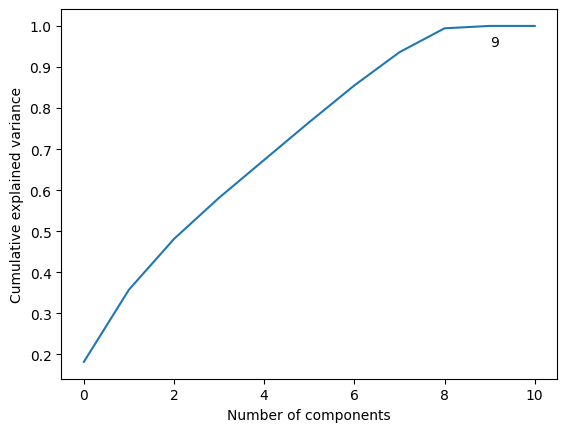

In [65]:
#Plot Elbow Curve
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('9',xy=(9, .95))

In [66]:
# consider first 9 components as they are explaining the 93% of variation in the data
x_pca = PCA(n_components=9)
nyc_taxi_pca_norm_final = x_pca.fit_transform(nyc_taxi_pca_norm)

Text(0.5, 1.0, 'Correlation between different features')

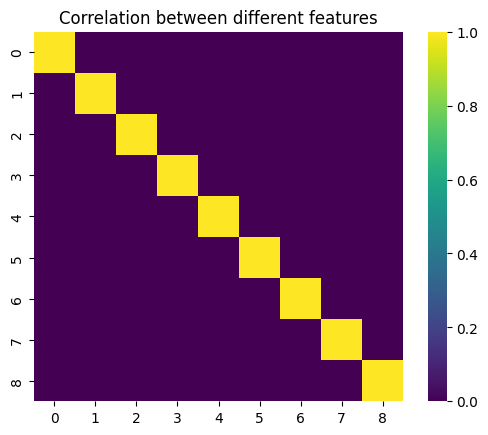

In [67]:
# correlation between the variables after transforming the data with PCA is 0
correlation = pd.DataFrame(nyc_taxi_pca_norm_final).corr()
sns.heatmap(correlation, vmax=1, square=True,cmap='viridis')
plt.title('Correlation between different features')

## XGB Regressor after PCA

In [68]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV ,cross_val_score, KFold

X2=preprocessing.scale(nyc_taxi_pca_norm_final)
X=pd.DataFrame(X2)
y=target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

model = xgb.XGBRegressor()
model.fit(X_train,y_train)
print(model)
y_pred = model.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
    
# Train RMSE
y_pred_test=model.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(model, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Mean Absolute Error    : 126.3451021157813
Mean Squared Error     : 2811867.087699591
Root Mean Squared Error =  1676.862274517377
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 774.8113

## Ridge Regression after PCA

In [69]:
X2=preprocessing.scale(nyc_taxi_pca_norm_final)
X=pd.DataFrame(X2)
y=target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridgeReg = Ridge(alpha=0.05)
ridgeReg.fit(X_train_scaled, y_train)

y_pred = ridgeReg.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

#Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=ridgeReg.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(ridgeReg, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean Absolute Error    : 310.98945913400667
Mean Squared Error     : 3050801.5107671395
Root Mean Squared Error =  1746.6543764486262
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 1765.8021529472805
Maximum Error is : 85385.81462124466
Minimum Error is : -13456.31132999428
Mean cross-validation score: 0.10


In [70]:
res = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
res.head(1)

,Actual,Predicted
2188799,189.0,709.733904


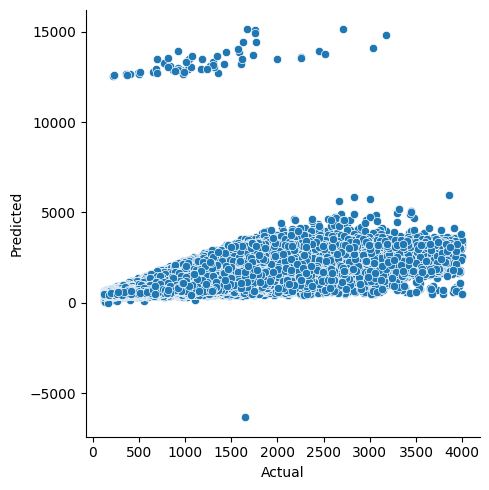

In [71]:
XX = res[res['Actual'] < 4000]
sns.relplot(x='Actual',y='Predicted',data=XX)

## Ridge Regression CV after PCA

In [72]:
X2=preprocessing.scale(nyc_taxi_pca_norm_final)
X=pd.DataFrame(X2)
y=target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=111)

ridgeRegCV = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridgeRegCV.fit(X_train,y_train)


y_pred = ridgeRegCV.predict(X_test)

rmse_val=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Null RMSE
y_null = np.zeros_like(y_test, dtype=int)
y_null.fill(y_test.mean())
N_RMSE=np.sqrt(metrics.mean_squared_error(y_test, y_null))
# Metrics
print('Mean Absolute Error    :', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error     :', metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error = ",rmse_val)
print("Null RMSE = ",N_RMSE)
if N_RMSE < rmse_val:print("Model is Not Doing Well Null RMSE Should be Greater")
else:print("Model is Doing Well Null RMSE is Greater than RMSE")
# Train RMSE
y_pred_test=ridgeRegCV.predict(X_train)
rmse_val=np.sqrt(metrics.mean_squared_error(y_train, y_pred_test))
print('Train Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_pred_test)))
# Error Percentage
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,'Error':y_test -y_pred})
print("Maximum Error is :",df.Error.max())
print("Minimum Error is :",df.Error.min())
# Score
scores = cross_val_score(ridgeRegCV, X_train,y_train,cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean Absolute Error    : 310.7937937356585
Mean Squared Error     : 3050574.1342682685
Root Mean Squared Error =  1746.589286085389
Null RMSE =  1827.9089302333052
Model is Doing Well Null RMSE is Greater than RMSE
Train Root Mean Squared Error: 1765.7996780304513
Maximum Error is : 85387.10857822798
Minimum Error is : -13426.861839904379
Mean cross-validation score: 0.10
